In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [58]:
def plotImage(x, y, im):
    bb = Bbox.from_bounds(x,y,1,1)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2,
                        norm = None,
                        origin=None,
                        clip_on=False)

    bbox_image.set_data(im)
    ax.add_artist(bbox_image)

In [2]:
df = pd.read_csv('./Football-data.co.uk/E0/17-18.csv', index_col=0)

In [3]:
df.head()
    

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,xGH,xGA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25,2.436114,1.366254
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29,0.755044,1.567297
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25,1.565334,0.811095
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51,1.324664,1.467438
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42,0.522517,0.485924


In [4]:
df = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'xGH', 'xGA']]

In [5]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,xGH,xGA
0,Arsenal,Leicester,4,3,2.436114,1.366254
1,Brighton,Man City,0,2,0.755044,1.567297
2,Chelsea,Burnley,2,3,1.565334,0.811095
3,Crystal Palace,Huddersfield,0,3,1.324664,1.467438
4,Everton,Stoke,1,0,0.522517,0.485924


In [8]:
grouped = df.groupby(by=['HomeTeam'])[['FTHG', 'FTAG', 'xGH', 'xGA']].sum()
grouped_away =  df.groupby(by=['AwayTeam'])[['FTHG', 'FTAG', 'xGH', 'xGA']].sum()
grouped_away.columns = ['FTHGa', 'FTAGa', 'xGHa', 'xGAa']

In [9]:
grouped = grouped.merge(grouped_away, right_index=True, left_index=True)

In [10]:
grouped.head()

,FTHG,FTAG,xGH,xGA,FTHGa,FTAGa,xGHa,xGAa
HomeTeam,,,,,,,,
Arsenal,11,3,8.558615,3.354644,5,0,4.014213,4.134953
Bournemouth,3,5,4.343144,5.629795,6,1,5.186555,2.059976
Brighton,4,3,3.057398,3.994247,6,1,6.336452,3.192855
Burnley,1,1,2.170293,3.041966,4,6,9.055355,2.808653
Chelsea,4,4,3.892303,4.074956,2,8,3.393652,2.641534


In [11]:
grouped['goals'] = grouped['FTHG'] + grouped['FTAGa']
grouped['goals_conceded'] = grouped['FTAG'] + grouped['FTHGa']
grouped['xG'] = grouped['xGH'] + grouped['xGAa']
grouped['xG_conceded'] = grouped['xGA'] + grouped['xGHa']

In [12]:
grouped.sort_values('xG', ascending=False).head()

,FTHG,FTAG,xGH,xGA,FTHGa,FTAGa,xGHa,xGAa,goals,goals_conceded,xG,xG_conceded
HomeTeam,,,,,,,,,,,,
Man City,11,1,7.939316,1.551362,1,11,2.588936,8.158285,22,2,16.097601,4.140299
Man United,14,0,10.555885,3.055987,2,7,3.866555,5.434092,21,2,15.989977,6.922543
Tottenham,2,3,6.820004,2.153620,2,12,3.202013,7.257167,14,5,14.077171,5.355634
Liverpool,6,1,6.784977,1.832680,11,7,7.025495,6.854071,13,12,13.639048,8.858175
Arsenal,11,3,8.558615,3.354644,5,0,4.014213,4.134953,11,8,12.693567,7.368857


In [43]:
to_plot = grouped[['goals', 'goals_conceded', 'xG', 'xG_conceded']]
to_plot.head()

,goals,goals_conceded,xG,xG_conceded
HomeTeam,,,,
Arsenal,11,8,12.693567,7.368857
Bournemouth,4,11,6.403119,10.816350
Brighton,5,9,6.250253,10.330699
Burnley,7,5,4.978946,12.097320
Chelsea,12,6,6.533837,7.468608


In [41]:
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
line = np.linspace(0, 24, 100)

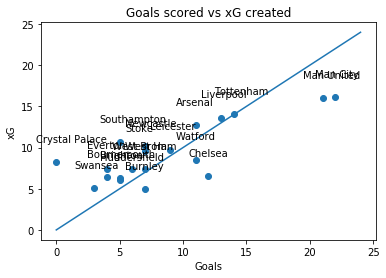

In [27]:
plt.figure()
plt.scatter(to_plot['goals'], to_plot['xG'])
plt.plot(line, line)
plt.xlabel('Goals')
plt.ylabel('xG')
plt.title('Goals scored vs xG created')

for label, x, y in zip(to_plot.index.values, to_plot['goals'], to_plot['xG']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points')

In [49]:
from matplotlib.pyplot import imread
teams = to_plot.index.values.tolist()
teams = [team.lower() for team in teams]

In [76]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
for team, x, y in zip(teams, to_plot['goals'], to_plot['xG']):
    plotImage(x, y, imread('./club_logos/' + team + '.png'))

ax.plot(line, line)
# Set the x and y limits
ax.set_ylim(0,20)
ax.set_xlim(0,23)
plt.xlabel('Goals', fontsize=64)
plt.ylabel('xG', fontsize=64)
plt.title('Goals scored vs xG created', fontsize=64)
ax.tick_params(labelsize=56)

plt.savefig('xg_created.png')
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99,
                        wspace=None, hspace=None)
plt.close()

In [77]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
for team, x, y in zip(teams, to_plot['goals_conceded'], to_plot['xG_conceded']):
    plotImage(x, y, imread('./club_logos/' + team + '.png'))

ax.plot(line, line)
# Set the x and y limits
ax.set_ylim(0,20)
ax.set_xlim(0,23)
plt.xlabel('Goals conceded', fontsize=64)
plt.ylabel('xG conceded', fontsize=64)
plt.title('Goals conceded vs xG conceded', fontsize=64)
ax.tick_params(labelsize=56)

plt.savefig('xg_conceded.png')
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99,
                        wspace=None, hspace=None)
plt.close()